In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/05%20-%20Data%20Preprocessing%20with%20EDA/Test/Loan_Default.csv',sep=',')

In [3]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
data.dropna(subset=['loan_purpose','Neg_ammortization','term'], inplace=True)

In [9]:
data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36365
Interest_rate_spread         36557
Upfront_charges              39561
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               15061
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9141
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            192
submission_of_applic

In [10]:
data.drop(columns='ID', inplace=True)

In [11]:
data['age'].mode()

0    45-54
Name: age, dtype: object

In [12]:
data['age'].fillna(data['age'].mode()[0],inplace=True)

In [13]:
data['age'].isna().sum()

0

In [14]:
data['submission_of_application'].value_counts()

to_inst     95641
not_inst    52541
Name: submission_of_application, dtype: int64

In [15]:
data['submission_of_application'].fillna(data['submission_of_application'].mode()[0],inplace=True)

In [16]:
data['approv_in_adv'].value_counts()

nopre    124398
pre       23068
Name: approv_in_adv, dtype: int64

In [17]:
data['approv_in_adv'].fillna(data['approv_in_adv'].mode()[0],inplace=True)

In [18]:
data['loan_limit'].value_counts()

cf     135072
ncf      9958
Name: loan_limit, dtype: int64

In [19]:
data['loan_limit'].fillna(data['loan_limit'].mode()[0],inplace=True)

In [20]:
data['income'].value_counts()

0.0        1259
3600.0     1247
4200.0     1239
4800.0     1188
3120.0     1166
           ... 
35340.0       1
87720.0       1
77760.0       1
63120.0       1
79920.0       1
Name: income, Length: 999, dtype: int64

In [21]:
data['income'].mean()

6956.4801447932605

In [22]:
data['income'].median()

5760.0

In [23]:
data['income'].isna().sum()

9141

In [24]:
data['income'].fillna(data['income'].median(),inplace=True)

In [25]:
data['property_value'].value_counts()

308000.0     2787
258000.0     2759
358000.0     2677
408000.0     2533
328000.0     2520
             ... 
4758000.0       1
2968000.0       1
3488000.0       1
3018000.0       1
2698000.0       1
Name: property_value, Length: 383, dtype: int64

In [26]:
data['property_value'].mean()

497925.9637094657

In [27]:
data['property_value'].median()

418000.0

In [28]:
data['loan_amount'].value_counts()

206500     4598
256500     4070
156500     3958
226500     3931
486500     3814
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: loan_amount, Length: 210, dtype: int64

In [29]:
data.groupby('loan_amount')['property_value'].median()

loan_amount
16500        53000.0
26500        58000.0
36500        63000.0
46500        68000.0
56500       108000.0
             ...    
2926500    4878000.0
2986500    5508000.0
3006500    5258000.0
3346500          NaN
3576500    5208000.0
Name: property_value, Length: 210, dtype: float64

In [30]:
from sklearn.impute import KNNImputer

In [31]:
impute = KNNImputer(n_neighbors=3)

In [ ]:
data_loanamount_propertyvalue=data[['loan_amount','property_value']]

In [ ]:
impute.fit(data_loanamount_propertyvalue)

In [ ]:
data_loanamount_propertyvalue_knn=impute.transform(data_loanamount_propertyvalue)

In [ ]:
data_loanamount_propertyvalue_knn=pd.DataFrame(data_loanamount_propertyvalue_knn, columns= data_loanamount_propertyvalue.columns)

In [ ]:
data_loanamount_propertyvalue_knn

In [37]:
data=data.reset_index().drop(columns='index')

In [38]:
data_loanamount_propertyvalue_knn['property_value'].isna().sum()

0

In [39]:
data['property_value']=data_loanamount_propertyvalue_knn['property_value']

In [40]:
data['property_value'].isna().sum()

0

In [41]:
data['LTV'].value_counts()

81.250000    529
91.666667    498
80.038760    379
80.032468    328
94.956140    322
            ... 
49.776386      1
79.847756      1
8.230198       1
68.562670      1
32.802013      1
Name: LTV, Length: 8477, dtype: int64

In [42]:
data['LTV'].mean()

72.74324363727527

In [43]:
data['LTV'].median()

75.13586957

In [44]:
data['LTV'].fillna(data['LTV'].median(),inplace=True)

In [45]:
data['dtir1'].value_counts()

37.0    6831
36.0    6541
44.0    6483
49.0    6301
43.0    5298
42.0    5112
41.0    4872
40.0    4689
39.0    4531
38.0    4452
45.0    4447
48.0    4401
30.0    4252
47.0    4220
31.0    4204
46.0    4105
35.0    2662
33.0    2651
32.0    2634
34.0    2581
20.0    2105
24.0    1816
29.0    1783
22.0    1776
28.0    1749
23.0    1735
26.0    1710
27.0    1675
25.0    1658
21.0    1615
54.0     830
60.0     829
57.0     822
59.0     810
55.0     794
53.0     786
51.0     781
52.0     776
58.0     756
50.0     749
56.0     745
61.0     690
16.0     438
8.0      433
19.0     430
13.0     420
6.0      418
17.0     411
11.0     399
18.0     396
9.0      393
14.0     392
5.0      386
10.0     384
12.0     382
15.0     381
7.0      379
Name: dtir1, dtype: int64

In [46]:
data['dtir1'].mean()

37.73260444573166

In [47]:
data['dtir1'].median()

39.0

In [48]:
data['dtir1'].fillna(data['dtir1'].median(),inplace=True)

In [49]:
data['rate_of_interest'].mean()

4.04499995536073

In [50]:
data['rate_of_interest'].median()

3.99

In [51]:
data['rate_of_interest'].fillna(data['rate_of_interest'].median(),inplace=True)

In [52]:
data['Interest_rate_spread'].value_counts()

-0.0280    77
-0.0380    64
-0.0230    60
-0.1730    54
-0.1480    52
           ..
-0.4366     1
-0.6823     1
 1.3921     1
 1.6214     1
-0.3247     1
Name: Interest_rate_spread, Length: 22508, dtype: int64

In [53]:
data['Interest_rate_spread'].mean()

0.4415039546759439

In [54]:
data['Interest_rate_spread'].median()

0.3902

<Axes: >

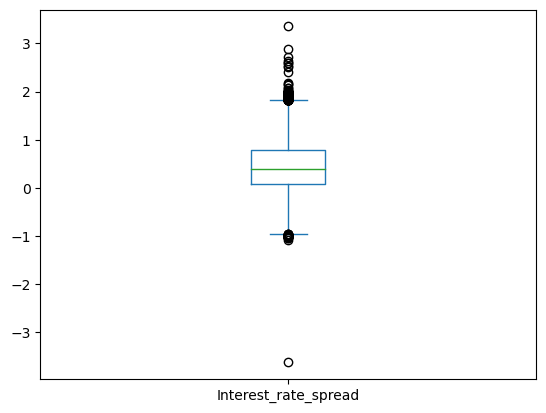

In [55]:
data['Interest_rate_spread'].plot(kind='box')

In [56]:
data['Interest_rate_spread'].fillna(data['Interest_rate_spread'].median(),inplace=True)

In [57]:
data['Upfront_charges'].value_counts()

0.00       20722
1250.00     1182
1150.00      891
795.00       484
295.00       403
           ...  
1783.74        1
2966.60        1
2591.15        1
4447.72        1
4323.33        1
Name: Upfront_charges, Length: 58178, dtype: int64

In [58]:
data['Upfront_charges'].mean()

3226.347108249933

In [59]:
data['Upfront_charges'].median()

2597.35

In [60]:
data.groupby('Credit_Score')['Upfront_charges'].mean()

Credit_Score
500    3371.573293
501    3110.354160
502    3020.502421
503    3460.761510
504    3097.841345
          ...     
896    3363.671702
897    3378.118873
898    3282.606341
899    3298.123067
900    2745.269382
Name: Upfront_charges, Length: 401, dtype: float64

<Axes: >

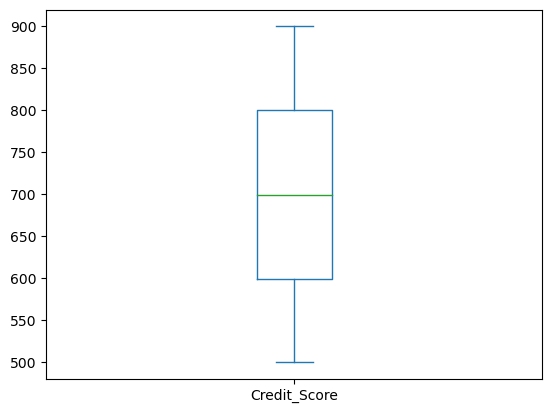

In [61]:
data['Credit_Score'].plot(kind='box')

In [62]:
data['Upfront_charges']=data.groupby('Credit_Score')['Upfront_charges'].transform(lambda x:x.fillna(x.mean()))

In [63]:
data.isna().sum()

year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

In [64]:
data['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [65]:
data['Gender'].value_counts()

Male                 42255
Joint                41319
Sex Not Available    37589
Female               27211
Name: Gender, dtype: int64

In [66]:
data['Gender'].replace({'Sex Not Available':data['Gender'].mode()[0]},inplace=True)

In [67]:
data['Gender'].unique()

array(['Male', 'Joint', 'Female'], dtype=object)

In [68]:
data['loan_type'].value_counts()

type1    112940
type2     20719
type3     14715
Name: loan_type, dtype: int64

In [69]:
data['Credit_Worthiness'].unique()

array(['l1', 'l2'], dtype=object)

In [70]:
data['open_credit'].unique()

array(['nopc', 'opc'], dtype=object)

In [71]:
data['business_or_commercial'].value_counts()

nob/c    127655
b/c       20719
Name: business_or_commercial, dtype: int64

In [72]:
data['term'].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276., 132., 216., 168., 204., 264.,
       252., 165., 280., 322.])

In [73]:
data['Neg_ammortization'].unique()

array(['not_neg', 'neg_amm'], dtype=object)

In [74]:
data['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

In [75]:
for col_name in data.select_dtypes(include=np.number).columns[:]:
    print(col_name)
    q1=data[col_name].quantile(.25)
    q3=data[col_name].quantile(.75)
    iqr=(q3-q1)
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    print(data.loc[(data[col_name]<low) | (data[col_name]>high),col_name])

year
Series([], Name: year, dtype: int64)
loan_amount
44         866500
108        906500
137       1376500
199        826500
227        986500
           ...   
148150     876500
148153     836500
148173    1006500
148230    1106500
148282     986500
Name: loan_amount, Length: 1888, dtype: int64
rate_of_interest
20        2.99
27        5.25
31        2.99
48        2.75
51        2.99
          ... 
148263    2.75
148299    5.25
148328    5.50
148359    5.99
148370    5.19
Name: rate_of_interest, Length: 6806, dtype: float64
Interest_rate_spread
30        1.4614
31       -0.6203
35        1.3774
48       -0.7794
63        1.5693
           ...  
148292    1.4657
148351    1.3253
148359    1.4300
148368    1.4015
148373    1.3871
Name: Interest_rate_spread, Length: 11451, dtype: float64
Upfront_charges
20        10470.00
37        13016.46
46        12283.66
54        14690.09
79         9323.75
            ...   
148323     9071.13
148334     9720.00
148340     7909.81
148346     900

In [76]:
data['LTV'].unique()

array([ 98.72881356,  75.13586957,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

In [77]:
data_only_numbers=data.select_dtypes(include=np.number)

In [78]:
data_only_numbers=data_only_numbers.drop(columns='year')

In [79]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_only_numbers), columns = data_only_numbers.columns )

In [80]:
data_scale

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,-1.167557,-0.085014,-0.086698,-0.017343,0.425919,-1.065629,-0.816282,0.502534,0.678905,1.748915,0.730828
1,-0.677950,-0.085014,-0.086698,-0.004606,0.425919,-0.276110,-0.302016,-1.275368,0.056695,1.748915,0.109882
2,0.410064,1.082081,-0.513198,-0.944224,0.425919,0.021121,0.412244,1.158460,0.185494,-0.571783,0.834319
3,0.682068,0.447345,0.565385,-0.072504,0.425919,0.439101,0.793182,-0.973297,-0.095185,-0.571783,0.420355
4,1.987685,-0.064538,-0.279542,-1.157706,0.425919,0.717755,0.564619,-0.843838,0.498455,-0.571783,0.109882
...,...,...,...,...,...,...,...,...,...,...,...
148369,0.573266,-1.856132,-0.385158,2.415881,-2.654656,0.299774,0.155111,-0.351894,-0.031472,-0.571783,1.041301
148370,1.389277,2.372029,0.954213,-1.157706,0.425919,0.801351,0.040829,-1.128648,0.038051,-0.571783,-2.373903
148371,0.627667,-1.856132,-0.778695,-0.717595,-2.654656,0.634159,0.002735,0.019221,-0.307339,-0.571783,1.144792
148372,-0.732351,-1.088306,0.344287,0.393478,-2.654656,-0.619783,0.040829,0.321292,-0.060727,-0.571783,-0.925029


In [81]:
data_only_cat=data.select_dtypes(exclude=np.number)

In [82]:
data_only_cat

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148369,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,55-64,to_inst,south,direct
148370,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,ir,home,4U,CIB,CIB,25-34,not_inst,south,direct
148371,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
148372,cf,Female,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,EXP,55-64,to_inst,North,direct


In [83]:
pd.get_dummies(data_only_cat)

,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,1,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,1,0,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148369,1,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
148370,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
148371,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
148372,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [84]:
data_only_cat_dummies=pd.get_dummies(data_only_cat)

In [85]:
data_scale = data_scale.reset_index().drop(columns = 'index')

In [86]:
data_only_cat_dummies = data_only_cat_dummies.reset_index().drop(columns = 'index')

In [87]:
scaled_data=pd.concat([data_scale,data_only_cat_dummies],axis=1)

In [88]:
scaled_data

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,-1.167557,-0.085014,-0.086698,-0.017343,0.425919,-1.065629,-0.816282,0.502534,0.678905,1.748915,...,0,0,0,1,0,0,0,1,0,1
1,-0.677950,-0.085014,-0.086698,-0.004606,0.425919,-0.276110,-0.302016,-1.275368,0.056695,1.748915,...,0,0,0,1,1,0,0,0,0,1
2,0.410064,1.082081,-0.513198,-0.944224,0.425919,0.021121,0.412244,1.158460,0.185494,-0.571783,...,0,0,0,1,0,0,0,1,0,1
3,0.682068,0.447345,0.565385,-0.072504,0.425919,0.439101,0.793182,-0.973297,-0.095185,-0.571783,...,0,0,1,0,1,0,0,0,0,1
4,1.987685,-0.064538,-0.279542,-1.157706,0.425919,0.717755,0.564619,-0.843838,0.498455,-0.571783,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148369,0.573266,-1.856132,-0.385158,2.415881,-2.654656,0.299774,0.155111,-0.351894,-0.031472,-0.571783,...,0,0,0,1,0,0,0,1,0,1
148370,1.389277,2.372029,0.954213,-1.157706,0.425919,0.801351,0.040829,-1.128648,0.038051,-0.571783,...,0,0,1,0,0,0,0,1,0,1
148371,0.627667,-1.856132,-0.778695,-0.717595,-2.654656,0.634159,0.002735,0.019221,-0.307339,-0.571783,...,0,0,1,0,1,0,0,0,0,1
148372,-0.732351,-1.088306,0.344287,0.393478,-2.654656,-0.619783,0.040829,0.321292,-0.060727,-0.571783,...,0,0,0,1,1,0,0,0,0,1


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

year


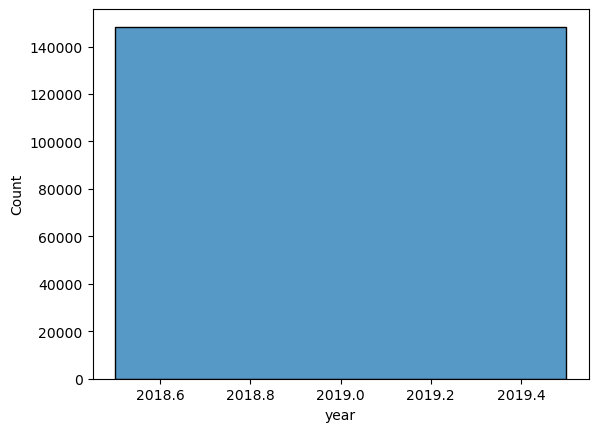

loan_amount


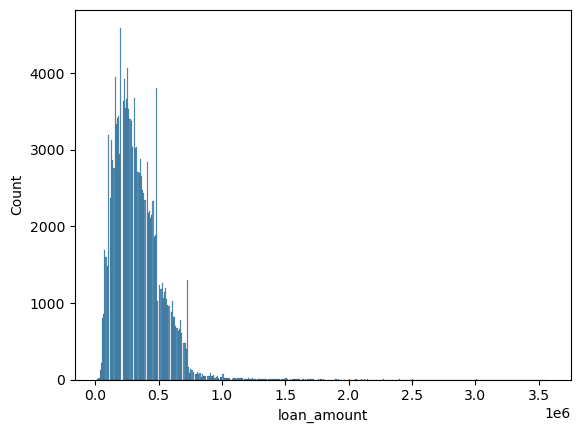

rate_of_interest


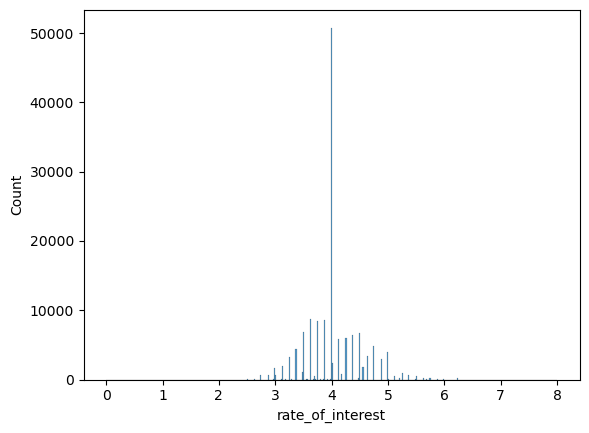

Interest_rate_spread


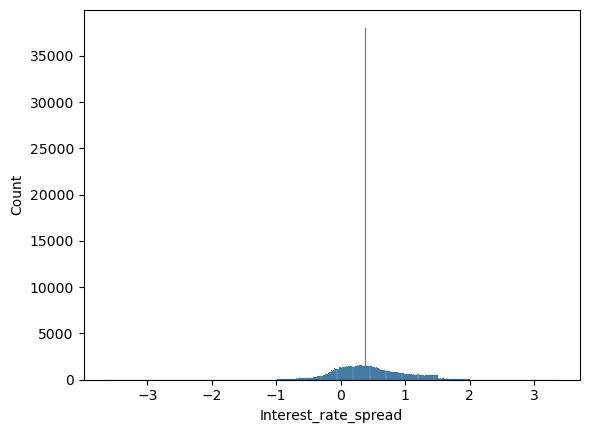

Upfront_charges


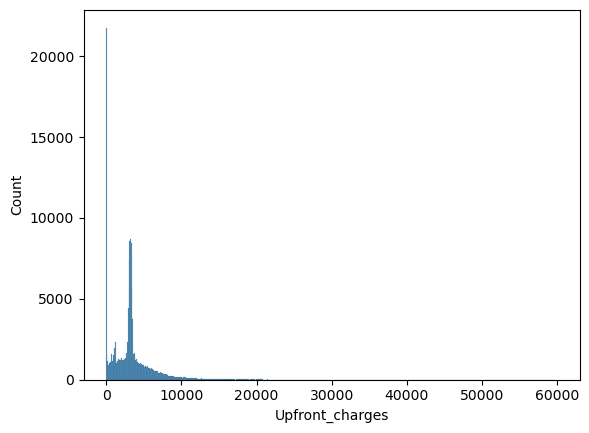

term


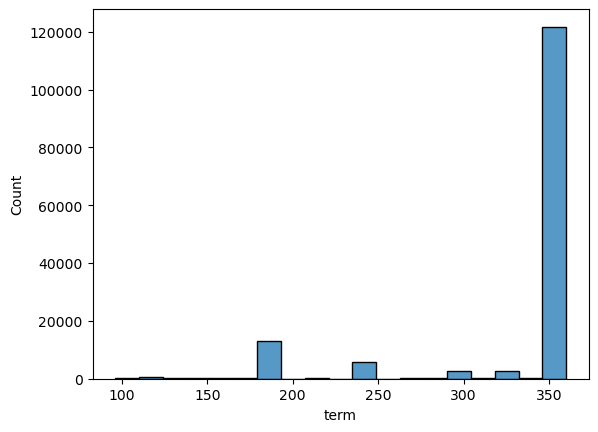

property_value


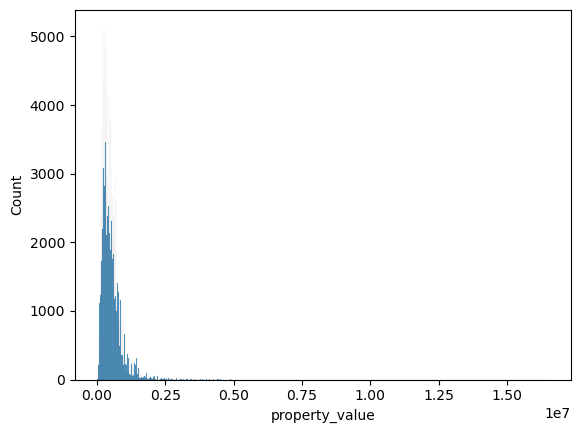

income


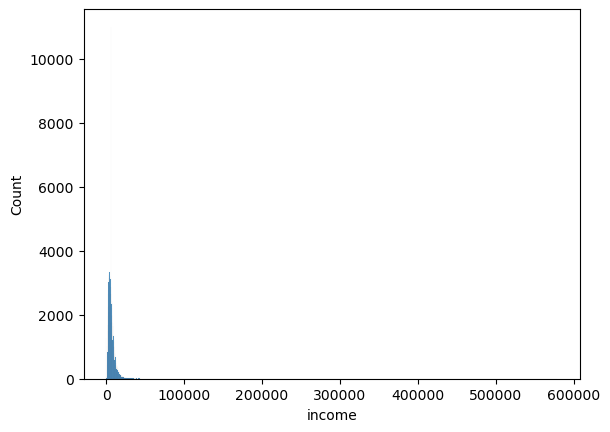

Credit_Score


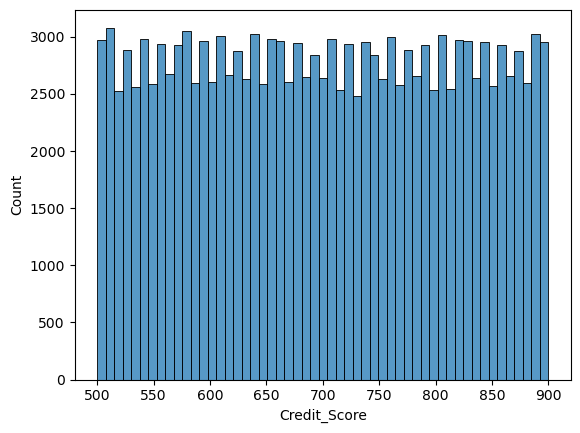

LTV


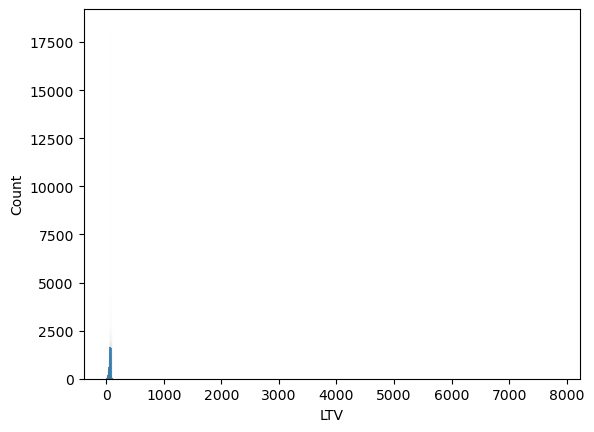

Status


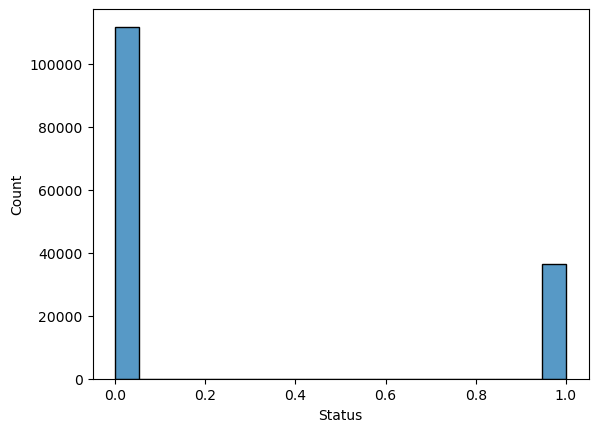

dtir1


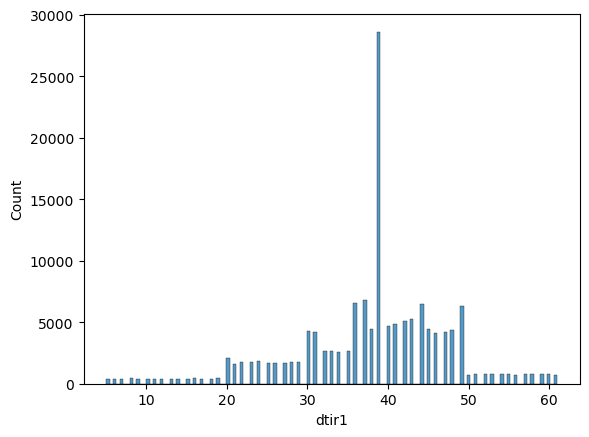

In [90]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.histplot(data[col])
    plt.show()

year


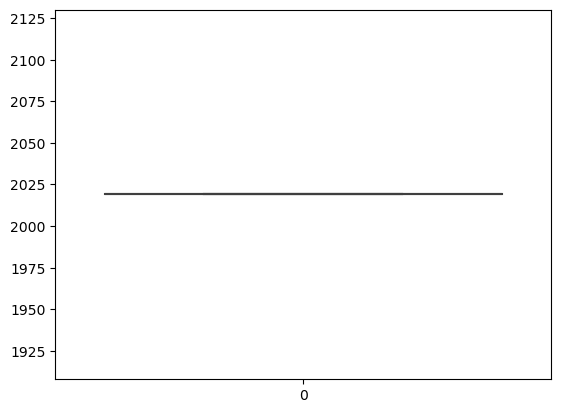

loan_amount


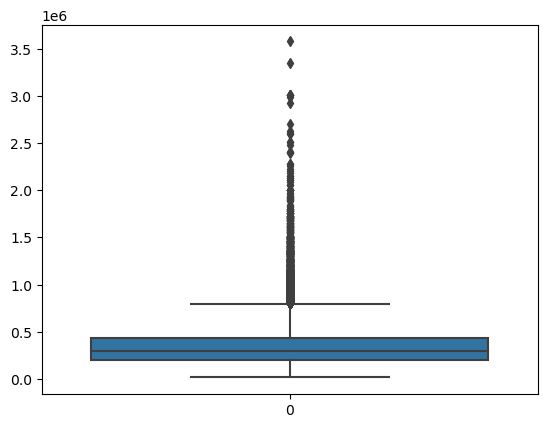

rate_of_interest


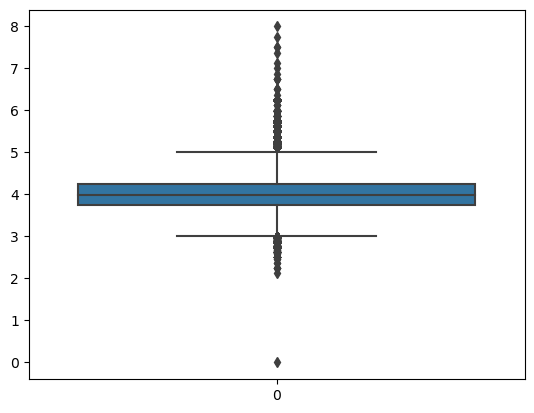

Interest_rate_spread


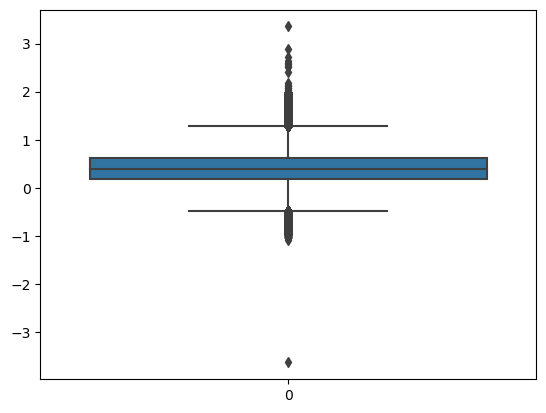

Upfront_charges


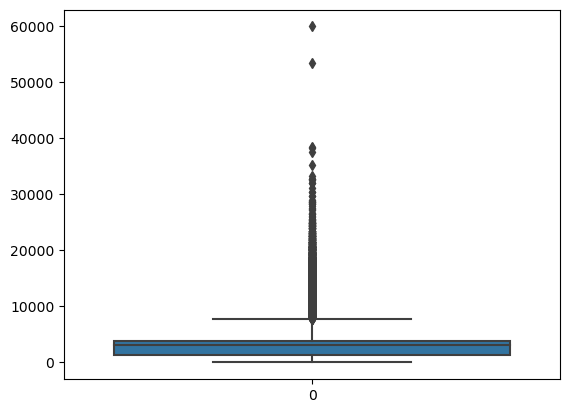

term


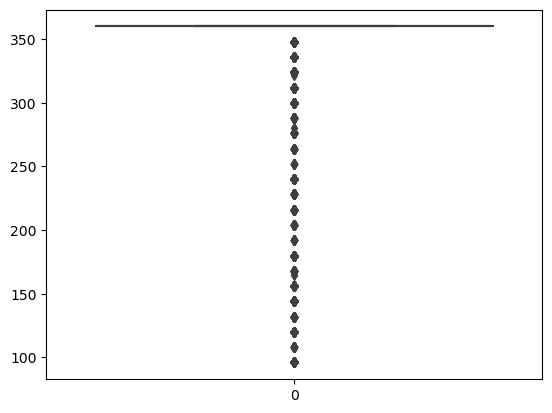

property_value


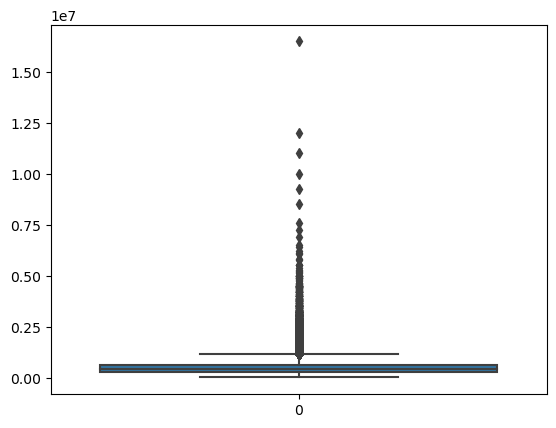

income


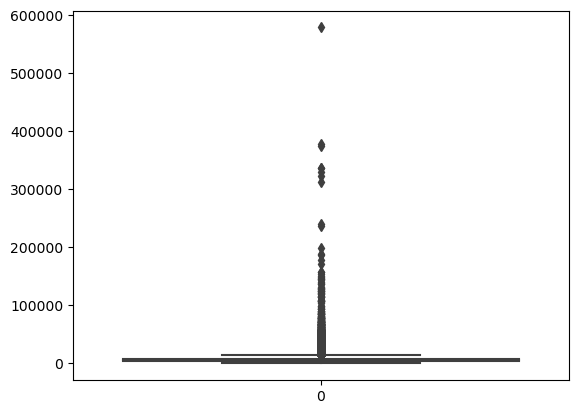

Credit_Score


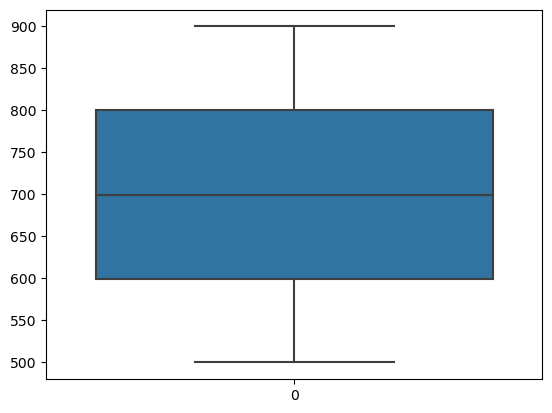

LTV


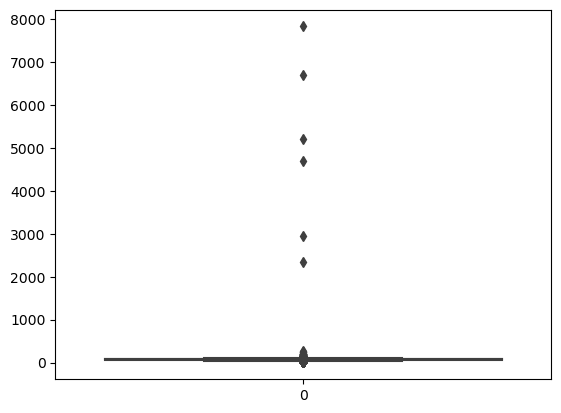

Status


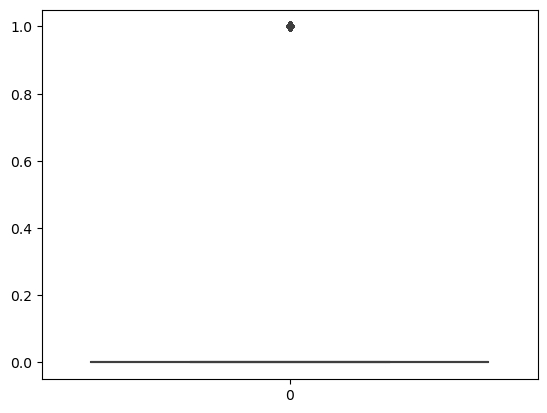

dtir1


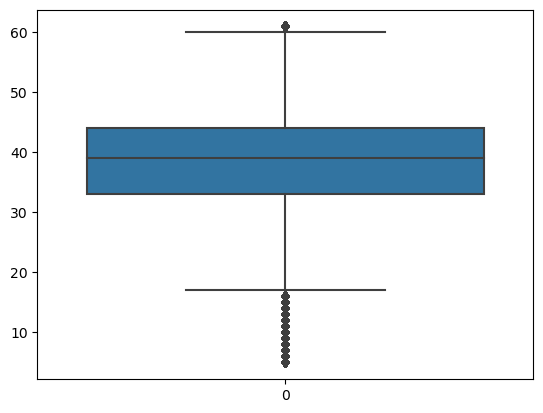

In [91]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()

year


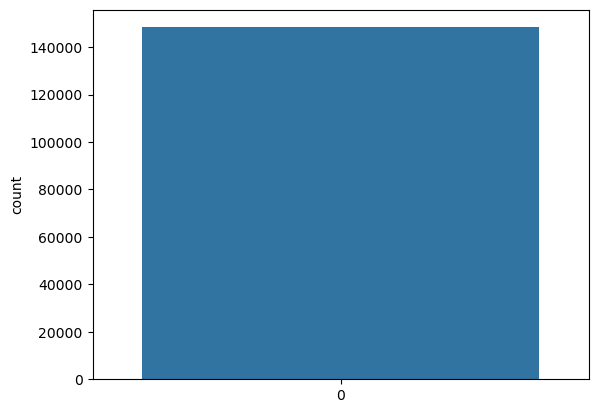

loan_amount


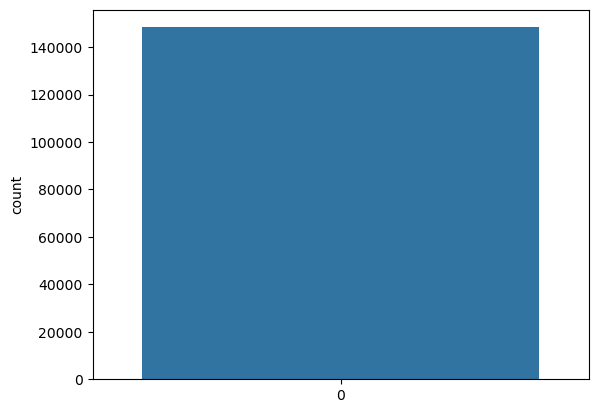

rate_of_interest


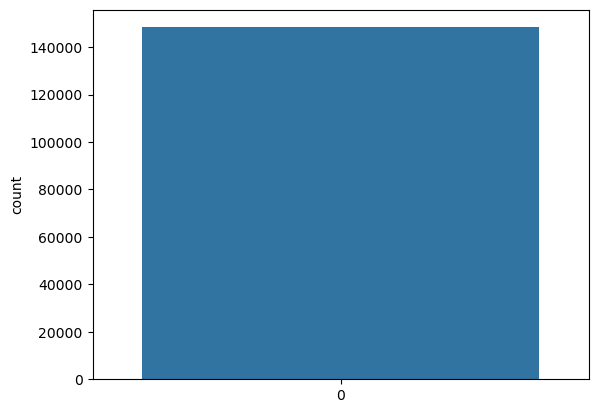

Interest_rate_spread


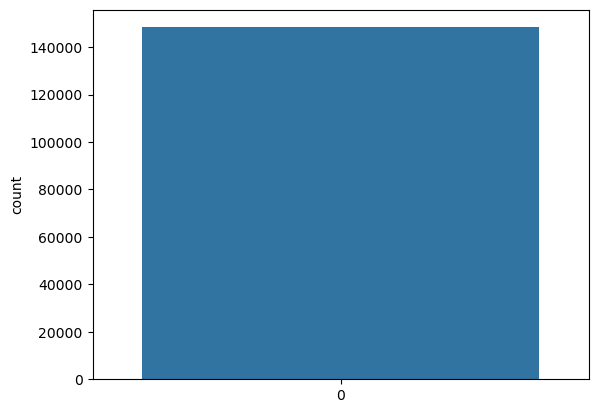

Upfront_charges


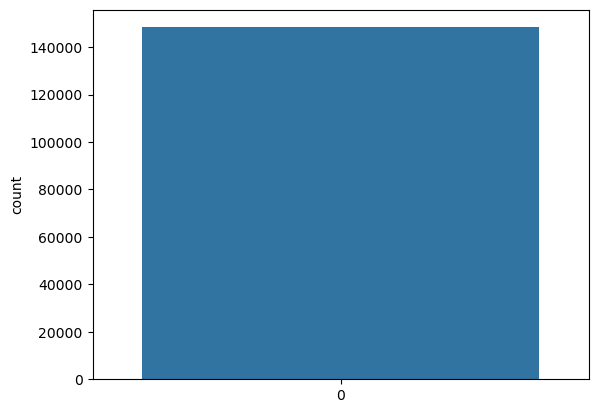

term


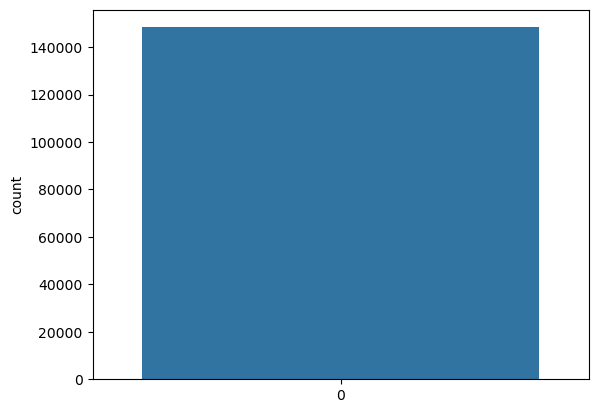

property_value


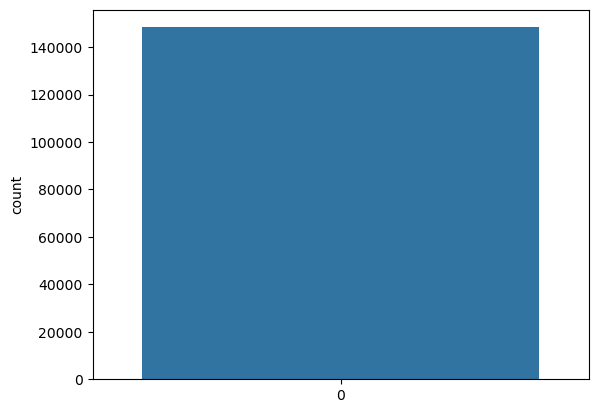

income


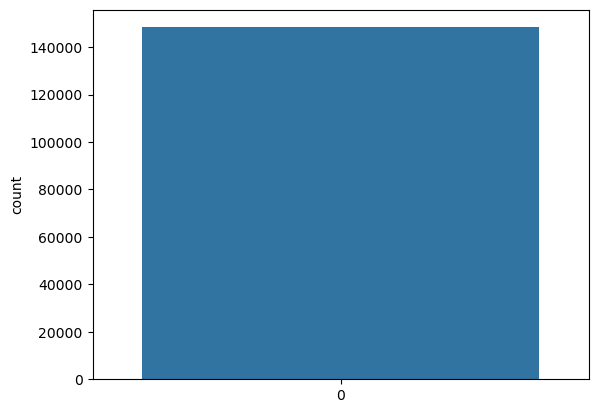

Credit_Score


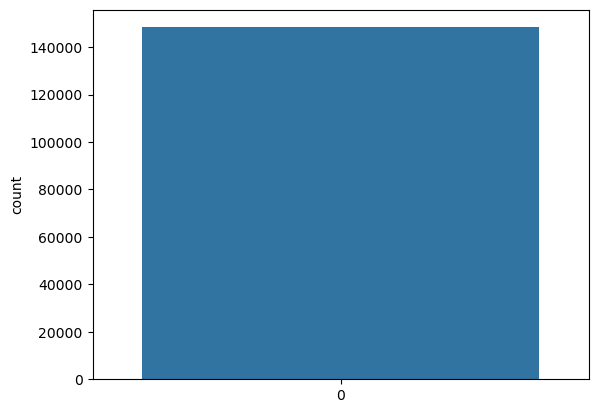

LTV


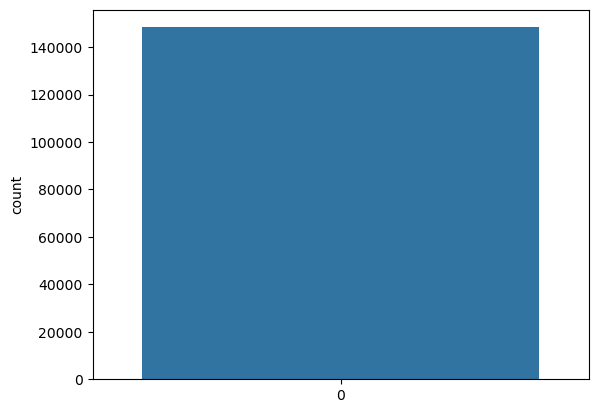

Status


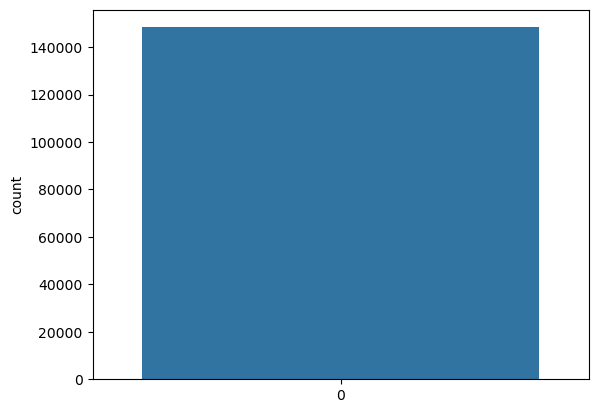

dtir1


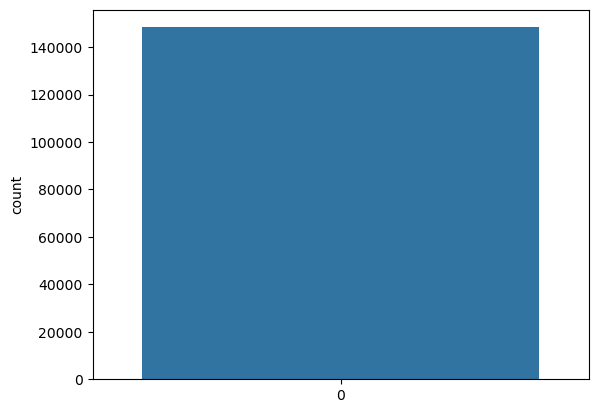

In [92]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.countplot(data[col])
    plt.show()

<Axes: ylabel='loan_amount'>

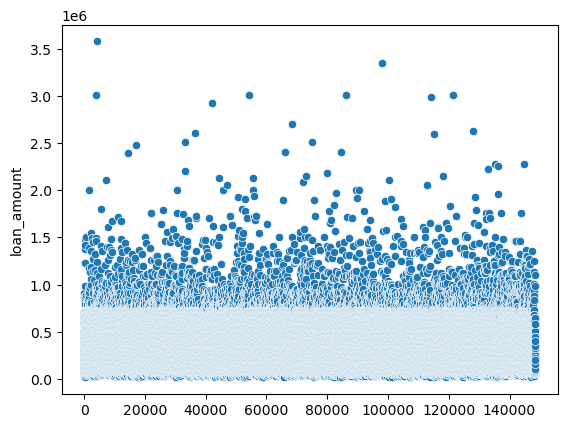

In [93]:
sns.scatterplot(data['loan_amount'] )

In [ ]:
sns.pairplot(data)

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)